In [2]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')


/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [3]:
df = pd.read_csv("USArrests.csv")

In [4]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Data set Description
A data frame with 50 observations on 4 variables.

- Murder	numeric	Murder arrests (per 100,000)
- Assault	numeric	Assault arrests (per 100,000)
- UrbanPop	numeric	Percent urban population
- Rape	numeric	Rape arrests (per 100,000)


In [5]:
# quick statistical description of the data set 
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


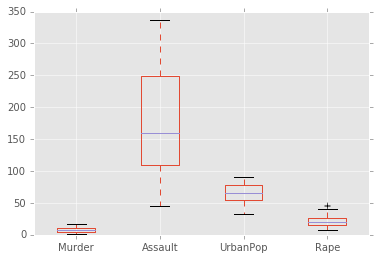

In [6]:
df.plot(kind = 'box')

Findings:
- on an average , there are 3 times as many rapes as murders
- 8 times as many Assaults as rapes

In [7]:
df[[1]].mean()

Murder    7.788
dtype: float64

In [8]:
for i in range(0 , len(df.columns)):
    print " The variance for %r is % r" %(df.columns[i] , df[[i]].var())

 The variance for 'State' is Series([], dtype: float64)
 The variance for 'Murder' is Murder    18.970465
dtype: float64
 The variance for 'Assault' is Assault    6945.165714
dtype: float64
 The variance for 'UrbanPop' is UrbanPop    209.518776
dtype: float64
 The variance for 'Rape' is Rape    87.729159
dtype: float64


- The 'Assault' feature has the highest and most significant variance , and hence it is needed to scale these variables to have a mean 0 and stddev = 1

In [9]:
# creating an instance of PCA with all components, whiten will ensure unit stddev
pca = decomposition.PCA(n_components = 4 , whiten = True)

In [10]:
X = df[['Murder' , 'Assault' , 'UrbanPop' , 'Rape']]

In [11]:
## Lets explicitly scale the features 
X_dash = pd.DataFrame(preprocessing.scale(X) ,columns = ['Murder' , 'Assault' , 'UrbanPop' , 'Rape'])

In [12]:
X_dash.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [13]:
X_dash.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


- As evident now each of the column has been transformed with stddev = 1

In [14]:
pca_dash = decomposition.PCA().fit(X_dash)

In [33]:
X_red = pca_dash.fit_transform(X_dash)

In [34]:
pca_dash.components_

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

- The shape of the component Matrix is [n_components, n_features] 
- PC1 is represented by row1 

In [16]:
pca_dash.explained_variance_ratio_ 

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

In [17]:
df_pca_var = pd.DataFrame(pca_dash.explained_variance_ratio_.T )

In [18]:
df_pca_var.index +=1

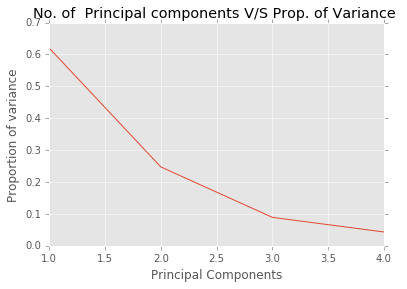

In [19]:
plt.plot(df_pca_var)
plt.xlabel('Principal Components')
plt.ylabel('Proportion of variance')
plt.title('No. of  Principal components V/S Prop. of Variance ')

50

In [23]:
X_dash.shape

(50, 4)

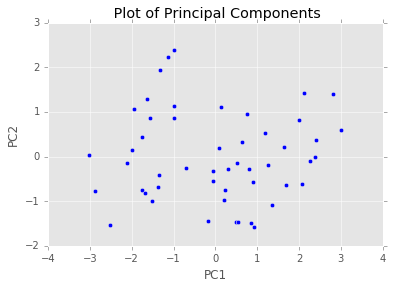

In [39]:

plt.figure()
for i in range(0 , len(X_red)):
    plt.scatter(X_red[i, 0], X_red[i, 1])
# plt.legend()
# plt.title('PCA of IRIS dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(' Plot of Principal Components')



1.0000000000000002